In [31]:
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
import datetime as dt

import wfdb

2.0.0


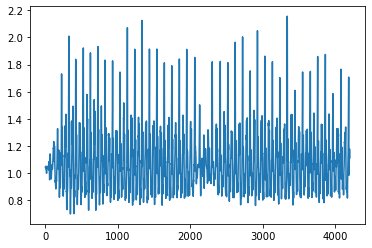

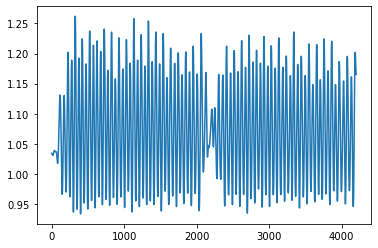

In [32]:
allData = []
label = [];

for i in range(45):

    index = '{:03}'.format(i)
    fileName = 'LabWalks/co' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        label.append(0)
    
    index = '{:03}'.format(i)
    fileName = 'LabWalks/fl' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        label.append(1)

        
X_train, X_test, y_train, y_test = train_test_split(
    allData, label, test_size=0.2,random_state=0)

plt.plot(allData[3])
plt.figure()
a = gaussian_filter(allData[3], sigma = 10)
plt.plot(a)

(2470, 1000) (2470,)


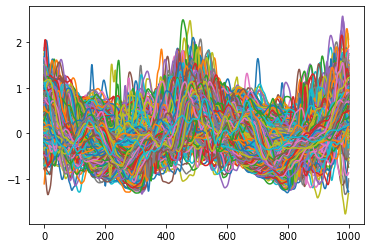

In [33]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X_t = []
y_t = []

alldata = X_train
numItems = -1
for one in alldata:
    numItems = numItems + 1;
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X_t.append(processedData)
            y_t.append(y_train[numItems]) 

print(np.shape(X_t), np.shape(y_t))
plt.plot(np.array(X_t).T)
plt.show()

(612, 1000) (612,)


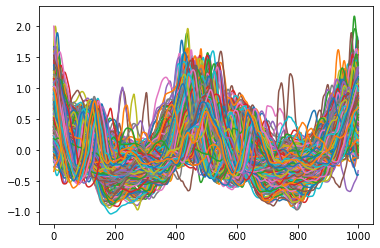

In [34]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X_ts = []
y_ts = []

alldata = X_test
numItems = -1
for one in alldata:
    numItems = numItems + 1;
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X_ts.append(processedData)
            y_ts.append(y_test[numItems]) 

print(np.shape(X_ts), np.shape(y_ts))
plt.plot(np.array(X_ts).T)
plt.show()

In [35]:
X_tf =  np.array(X_t)
X_tsf =  np.array(X_ts)

X_tfn = np.concatenate((X_tf, np.flip(X_tf, 1)), axis=0)
y_tfn = np.concatenate((y_tf, y_tf), axis=0)
X_tsfn = np.concatenate((X_tsf, np.flip(X_tsf, 1)), axis=0)
y_tsfn = np.concatenate((y_tsf, y_tsf), axis=0)

print(np.shape(X_tfn))
print(np.shape(y_tfn))
print(np.shape(X_tsfn))
print(np.shape(y_tsfn))

(4940, 1000)
(9964,)
(1224, 1000)
(2364,)


(4940, 1000) (4940,)
(1224, 1000) (1224,)


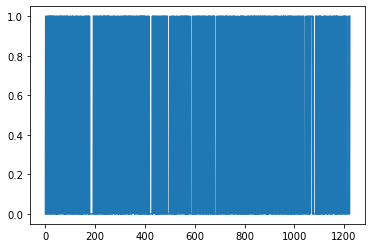

In [36]:
random_state = check_random_state(0)
permutation = random_state.permutation(np.array(X_tfn).shape[0])
X_tf = np.array(X_tfn)[permutation]
y_tf = np.array(y_tfn)[permutation]

permutation = random_state.permutation(np.array(X_tsfn).shape[0])
X_tsf = np.array(X_tsfn)[permutation]
y_tsf = np.array(y_tsfn)[permutation]

print(np.shape(X_tf), np.shape(y_tf))
print(np.shape(X_tsf), np.shape(y_tsf))
plt.plot(y_tsf)

In [37]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_tf, y_tf, epochs=100)

test_loss = model.evaluate(X_tsf, y_tsf)

Train on 4940 samples
Epoch 1/100
4940/4940 [==============================] - 1s 131us/sample - loss: 0.2513 - accuracy: 0.5326
Epoch 2/100
4940/4940 [==============================] - 0s 76us/sample - loss: 0.2475 - accuracy: 0.5435
Epoch 3/100
4940/4940 [==============================] - 0s 69us/sample - loss: 0.2468 - accuracy: 0.5466
Epoch 4/100
4940/4940 [==============================] - 0s 72us/sample - loss: 0.2459 - accuracy: 0.5460
Epoch 5/100
4940/4940 [==============================] - 0s 74us/sample - loss: 0.2443 - accuracy: 0.5512
Epoch 6/100
4940/4940 [==============================] - 0s 71us/sample - loss: 0.2433 - accuracy: 0.5543
Epoch 7/100
4940/4940 [==============================] - 0s 72us/sample - loss: 0.2414 - accuracy: 0.5577
Epoch 8/100
4940/4940 [==============================] - 0s 71us/sample - loss: 0.2423 - accuracy: 0.5585
Epoch 9/100
4940/4940 [==============================] - 0s 73us/sample - loss: 0.2410 - accuracy: 0.5605
Epoch 10/100
4940/4940 

In [38]:
print(X_tf.shape)

(4940, 1000)


In [49]:
from tensorflow.keras.optimizers import RMSprop
X_tf = np.reshape(X_tf, (X_tf.shape[0], 1, 1000))
X_tsf = np.reshape(X_tsf, (X_tsf.shape[0], 1, 1000))

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                        strides=1, padding='causal',
                        activation='relu'),
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                        strides=1, padding='causal',
                        activation='relu'),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_tf, y_tf, epochs=200)
model.summary()
test_loss = model.evaluate(X_tsf, y_tsf)

Train on 4940 samples
Epoch 1/200
4940/4940 [==============================] - 1s 208us/sample - loss: 0.6938 - accuracy: 0.5296
Epoch 2/200
4940/4940 [==============================] - 1s 114us/sample - loss: 0.6900 - accuracy: 0.5417
Epoch 3/200
4940/4940 [==============================] - 1s 106us/sample - loss: 0.6881 - accuracy: 0.5393
Epoch 4/200
4940/4940 [==============================] - 1s 107us/sample - loss: 0.6869 - accuracy: 0.5381
Epoch 5/200
4940/4940 [==============================] - 1s 111us/sample - loss: 0.6843 - accuracy: 0.5433
Epoch 6/200
4940/4940 [==============================] - 1s 105us/sample - loss: 0.6829 - accuracy: 0.5451
Epoch 7/200
4940/4940 [==============================] - 1s 108us/sample - loss: 0.6817 - accuracy: 0.5488
Epoch 8/200
4940/4940 [==============================] - 1s 106us/sample - loss: 0.6767 - accuracy: 0.5597
Epoch 9/200
4940/4940 [==============================] - 1s 106us/sample - loss: 0.6759 - accuracy: 0.5595
Epoch 10/200
49